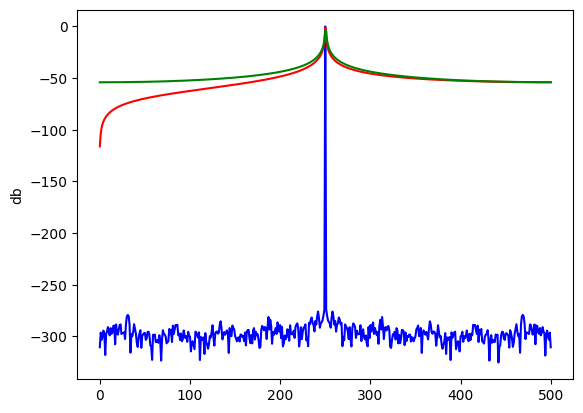

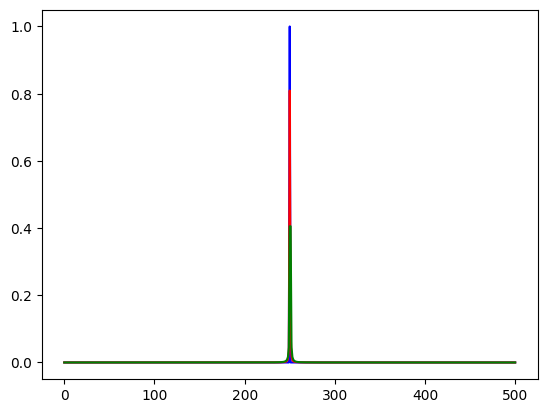

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  5 19:35:08 2022
@author: Guillermo Daniel Spagnolo
         daniespagnolo@frba.utn.edu.ar
"""

# a) Sea k0={N/4,N/4+0.25,N/4+0.5}. Notar que a cada senoidal se le agrega una pequeña desintonía respecto 
# a  Δf. Graficar las tres densidades espectrales de potencia (PDS's) y
# discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

from numpy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_sen( vmax , dc , ff, ph, nn , fs ):
    ts = 1/fs
    tt = np.linspace(0,(N-1)*ts,nn) #0 a (N-1)*Ts)
    xx = dc + vmax*np.sin(2*np.pi*ff*tt + ph)    
    return (tt, xx)



# que nuestra senoidal tenga potencia normalizada
N = 1000
fs = 1000
k0 = N/4
k0_1=N/4+0.25
k0_2=N/4+0.5

dc=0
# ph=np.p
ph=0
Δf = fs/N # resolución espectral Δf
# Senoidal de frecuencia
f0 = k0*Δf#k0∗fs /N
f0_1 = k0_1*Δf#k0∗fs /N
f0_2 = k0_2*Δf#k0∗fs /N

ff = np.arange(0,fs,Δf)

# ff = np.arange(0,fs,Δf/2)#ff rosita
zerospadding=10
#ff = np.arange(0,f,fs/(n*(zerospadding+1)))
Amplitud = np.sqrt(2)# A=2**(1/2)#amplitud


[tt,xx]  = mi_funcion_sen( vmax=Amplitud , dc=dc , ff=f0, ph=ph, nn=N , fs =fs)
[tt,xx1] = mi_funcion_sen( vmax=Amplitud , dc=dc , ff=f0_1, ph=ph, nn=N , fs =fs)
[tt,xx2] = mi_funcion_sen( vmax=Amplitud , dc=dc , ff=f0_2, ph=ph, nn=N , fs =fs)

X_fft  = fft(xx)/N
X_fft1 = fft(xx1)/N
X_fft2 = fft(xx2)/N

bfrec = ff <= fs/2#variable de direccionamiento

Area = np.sum(2*np.abs(X_fft[bfrec])**2)
Area1 = np.sum(2*np.abs(X_fft1[bfrec])**2)
Area2 = np.sum(2*np.abs(X_fft2[bfrec])**2)

plt.figure(1)#db
plt.plot(ff[bfrec],10*np.log10(2*np.abs(X_fft[bfrec])**2),'b', label = "frec = {:3.3f} Area{:3.3f}".format(fs*k0,Area))
plt.ylabel("db"),
plt.plot(ff[bfrec],10*np.log10(2*np.abs(X_fft1[bfrec])**2),'r',label='frec{:3.3f} Area{:3.3f}'.format(fs*k0_1,Area1))

plt.plot(ff[bfrec],10*np.log10(2*np.abs(X_fft2[bfrec])**2),'g',label='frec{:3.3f} Area{:3.3f}'.format(fs*k0_2,Area2))

# plt.plot(np.abs(X_fft ),"b.")
plt.show()
# potencia normalizada, es decir energía (o varianza) unitaria
#Ancho del delta se distribuyo en las otras figuras, se desparrama la enegia en el ancho de banda
plt.figure(2)
plt.plot(ff[bfrec],(2*np.abs(X_fft[bfrec])**2), 'b',label='frec{:3.3f} area{:3.3f}'.format(fs*k0,Area))
plt.plot(ff[bfrec],(2*np.abs(X_fft1[bfrec])**2),'r',label='frec{:3.3f} area{:3.3f}'.format(fs*k0_1,Area1))
plt.plot(ff[bfrec],(2*np.abs(X_fft2[bfrec])**2),'g',label='frec{:3.3f} area{:3.3f}'.format(fs*k0_2,Area2))

#no es multiplo de la resolucion espectral .No hay una proyeccion perfecta. Se ve la no ortonormalidad 
